In [1]:
baseline_test_wer ={
    "aln": 0.741,
    "bew": 0.427,
    "bxk": 0.41,
    "cgg": 	0.44,
    "el-CY": 0.312,
    "hch": 	0.591,
    "kcn": 0.504,
    "koo": 0.61,
    "led": 0.362,
    "lke": 0.695,
    "lth": 	0.336,
    "meh": 0.408,
    "mmc": 0.625,
    "pne": 0.404,
    "ruc": 0.59,
    "rwm": 0.658,
    "sco": 0.377,
    "tob": 1.014,
    "top": 0.995,
    "ttj": 0.354,
    "ukv": 	0.467,
    "ady": 0.8,
    "bas": 0.644,
    "kbd": 0.669,
    "qxp": 0.31,
    "ush": 1.001
}

In [ ]:
import pandas as pd
import json
import numpy as np
import os
model = "whisper-tiny"
rows = []
summary_df = pd.read_csv(f"{model}/summary.csv")
for result in os.listdir(f"{model}/hyperparameters"):
    with open(f"{model}/hyperparameters/" + result, "r") as f:
        hyps = json.load(f)
        f.close()
    if len(hyps) == 0:
        lang_name = result.split(".")[0]
        best_score = summary_df.loc[summary_df["language"] == lang_name].wer.item()
        best_lambda = None
        score_0 = None
    else:
        lang_name = result.split(".")[0]
        best_score = min(hyps.values())
        best_lambda = min(hyps, key=hyps.get)
        score_0 = hyps["0.0"]

    rows.append([lang_name, best_score, baseline_test_wer[lang_name], best_lambda, best_score - score_0 if score_0 is not None else None, ])

df = pd.DataFrame(rows, columns=["lang", "wer", "baseline", "best_lambda", "HR gains"])
df['improved'] = np.where(df['wer'] < df['baseline'], True, False)

df.sort_values(by="lang")

,lang,wer,baseline,best_lambda,HR gains,improved
0,ady,0.800375,0.800,0.1,-0.006676,False
12,aln,0.741720,0.741,0.3,-0.015321,False
3,bas,0.429450,0.644,0.1,-0.012962,True
13,bew,0.710467,0.427,0.2,-0.109477,False
20,bxk,0.737256,0.410,0.1,-0.013656,False
1,cgg,0.650350,0.440,0.2,-0.073208,False
22,el-CY,0.826870,0.312,0.2,-0.005684,False
21,hch,0.739133,0.591,0.2,-0.009842,False
6,kbd,0.652188,0.669,0.1,-0.022269,True
19,kcn,0.784398,0.504,0.4,-0.009911,False


In [20]:
import pandas as pd
import json
import numpy as np
import os
model = "results/whisper-tiny-NEW"
rows = []
summary_df = pd.read_csv(f"{model}/summary.csv")
for result in os.listdir(f"{model}/hyperparameters"):
    with open(f"{model}/hyperparameters/" + result, "r") as f:
        hyps = json.load(f)
        f.close()
    if len(hyps) == 0:
        lang_name = result.split(".")[0]
        best_score = summary_df.loc[summary_df["language"] == lang_name].wer.item()
        best_lambda = None
        score_0 = None
    else:
        lang_name = result.split(".")[0]
        best_score = min(hyps.values())
        best_lambda = min(hyps, key=hyps.get)
        score_0 = hyps["0.0"]

    rows.append([lang_name, best_score, score_0, baseline_test_wer[lang_name],  
                 best_lambda, best_score - score_0 if score_0 is not None else None, best_score-baseline_test_wer[lang_name]])

df = pd.DataFrame(rows, columns=["lang", "wer", "wer_no_HR", "baseline", "best_lambda", "HR gains", "delta baseline"])
df['improved'] = np.where(df['wer'] < df['baseline'], True, False)
df.sort_values(by="lang")

,lang,wer,wer_no_HR,baseline,best_lambda,HR gains,delta baseline,improved
4,ady,0.799100,0.806409,0.800,0.04022445861816864,-0.007309,-0.000900,True
5,aln,0.728949,0.747602,0.741,0.0351300872862339,-0.018653,-0.012051,True
18,bas,0.490765,0.502378,0.644,0.11555934976786375,-0.011613,-0.153235,True
1,bew,0.748596,0.856261,0.427,0.436308948870678,-0.107666,0.321596,False
13,bxk,0.813786,0.860752,0.410,0.05441153118151438,-0.046966,0.403786,False
6,cgg,0.610290,0.685492,0.440,0.21093589471308438,-0.075202,0.170290,False
9,el-CY,0.827242,0.852400,0.312,0.11710001205757978,-0.025157,0.515242,False
3,hch,0.851100,0.900041,0.591,0.15515734699049857,-0.048941,0.260100,False
20,kbd,0.644429,0.653470,0.669,0.073939832395239,-0.009042,-0.024571,True
22,kcn,0.666654,0.666654,0.504,0.0,0.000000,0.162654,False


Error in callback <function _draw_all_if_interactive at 0x12e2fc220> (for post_execute), with arguments args (),kwargs {}:


AttributeError: 'str' object has no attribute 'get_animated'

AttributeError: 'str' object has no attribute 'zorder'

<Figure size 640x480 with 1 Axes>

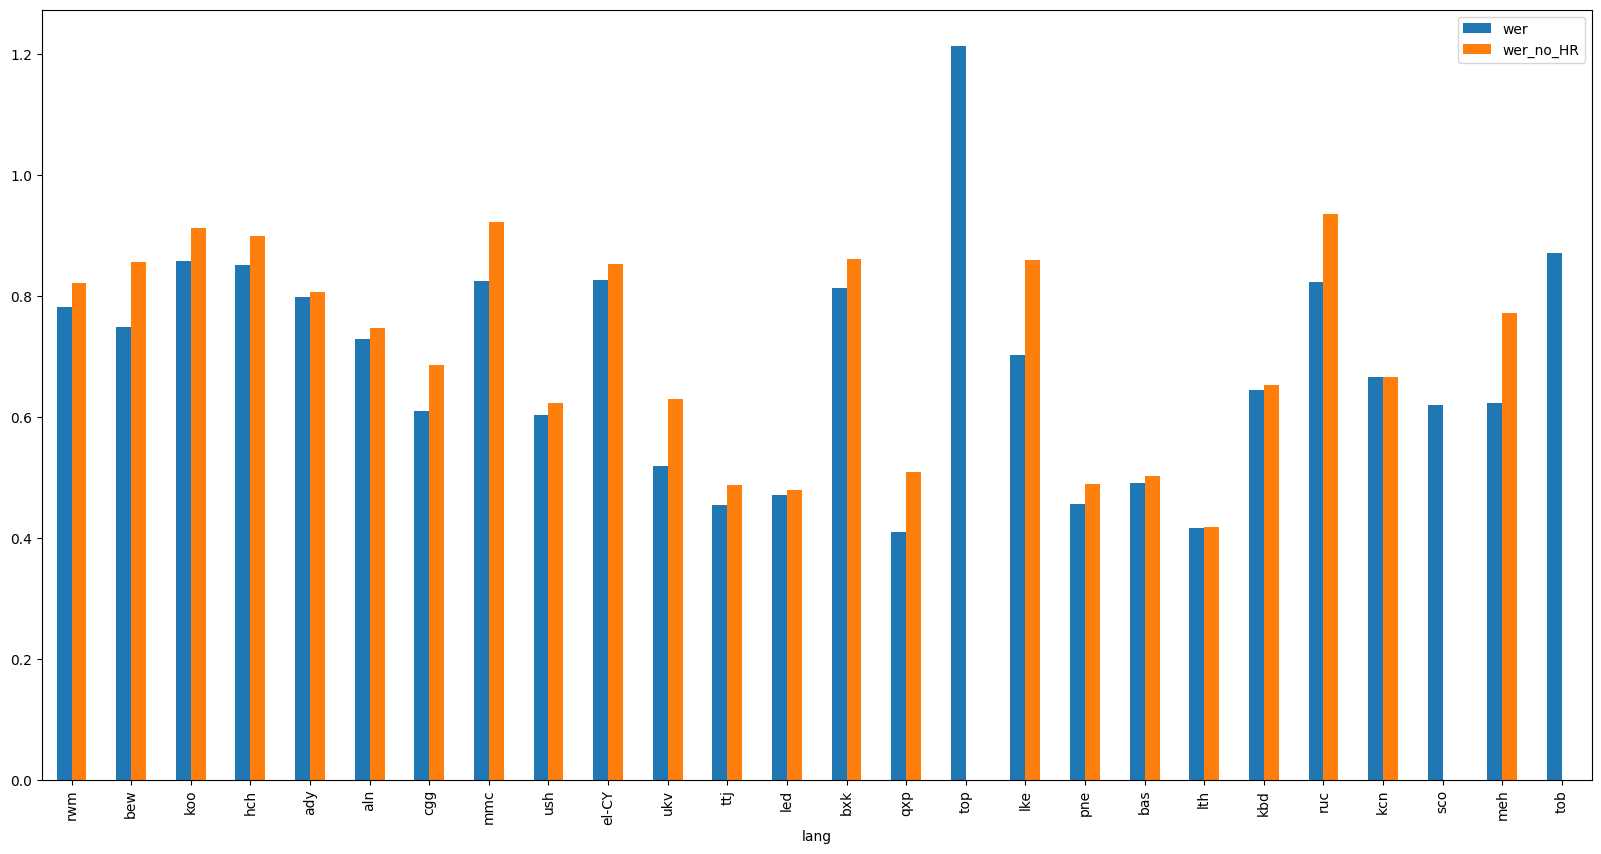

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

df2 = df[["lang", "wer", "wer_no_HR"]]

df2.set_index('lang').plot.bar(figsize=(20, 10))
ax.legend(["WER", "WER no HR language"])
ax.set_xlabel("Language")
ax.set_ylabel("WER")